# Subway Data Analysis

## Introduction

The NYC public transportantion system - Metro Transit Authority - provides data for download via csv files. Part of the information available are data from the subway turnstiles, containing weekly logs for cumulative entries and exits by turnstile and by subway station during a provided timeframe.


For this project, we will only use the information available at: http://web.mta.info/developers/turnstile.html.




# About this project

For this project, you will apply the knowledge acquired in the first month of this course. We will practice basic data acquisition and data cleaning tasks to find out fundamental stuff about the data using what we learned in the Statistics course. 

The goal of this project is to explore the relationship between data from the NYC Subway turnstiles and the city weather. For this, besides data from the subway, we will also need data from the weather in NYC. 

Here are the main points that will be considered in this work:

- Gathering data from the Internet
- Using Statistics for Data Analysis
- Data handling and simple graphics creation with `Pandas`

*How to find help*: We suggest that you try the following channels, in the following order:

| Type of Question\Channels    	| Google 	| Forum 	| Slack 	| Email 	|
|-------------------------------	|--------	|-------	|-------	|-------	|
| Pandas and Python Programming 	| 1      	| 2     	| 3     	|       	|
| Projects Requiriments         	|        	| 1     	| 2     	| 3     	|
| Projects Specific Parts       	|        	| 1     	| 2     	| 3     	|

Here is the address for each of these channels:

- Forum: https://discussions.udacity.com/c/ndfdsi-project
- Slack: [Big Data Foundations](https://goo.gl/4K7LWK)
- Email: india@udacity.com

**The student is expected to submit this report including:**

- All TODO's completed, as they are crucial for the code to run accordingly
- The ipynb file, exported as html

To submit this project, go to the [classroom](https://coco.udacity.com/nanodegrees/nd100-inbig/locale/en-us/versions/1.0.0/parts/469348/modules/469702/lessons/469703/project), and submit your zipped `.ipynb` and html.

# Reminders

Before we start, there are a few things you must have in mind while using iPython notebooks:

- Remember you can see, in the left side of a code cell, when was the last time it ran, if there is a number inside the keys.
- When starting a new session in the notebook, please make sure to run all cells up to the point where you last left it. Even if the output can still be viewed from the moment you ran your cells in the previews session, the kernel starts in a new state, so you will need to reload all data, etc. in a new session.
- The previous point is useful to have in mind if your answers do not match what is expected from the quizzes in the classroom. Try reloading the data and running all processing steps, one by one, to make sure you're working with the same variables and data from each step of the quizz.

## Session 1 - Data Gathering

### *Exercise 1.1*

Let's do it!! Now it's your turn to gather data. Please write bellow a Python code to access the link http://web.mta.info/developers/turnstile.html and download all files from June 2017. The file must be named turnstile_100617.txt, where 10/06/17 is the file's date.

Please see below a few commands that might help you:

Use the **urllib** library to open and redeem a webpage. Use the command below, where **url** is the webpage path to the following file:

```python
u = urllib.urlopen(url)
html = u.read()
```

Use the **BeautifulSoup** library to search for the link to the file you want to donwload in the page. Use the command below to create your *soup* object and search for all 'a' tags in the document:
 
 
```python
soup = BeautifulSoup(html, "html.parser")
links = soup.find_all('a')
```

A tip to only download the files from June is to check data in the name of the file. For instance, to donwload the 17/06/2017 file, please see if the link ends with *"turnstile_170610.txt"*. If you forget to do this, you will download all files from that page. In order to do this, you can use the following command:

```python
if '1706' in link.get('href'):
```

Our final tip is to use the command bellow to download the txt file:

```python
urllib.urlretrieve(link_do_arquivo, filename)
```

Please remember - you first have to load all packages and functions that will be used in your analysys.

In [34]:
import urllib
from bs4 import BeautifulSoup
import os

#i checked the documentation and there was submodule request and inside that we have urlopen
u=urllib.request.urlopen('http://web.mta.info/developers/turnstile.html')
html=u.read()
soup=BeautifulSoup(html, "html.parser")
links=soup.find_all('a')
files=list()

for link in links:
    if link.get('href')!=None and '1706' in link.get('href') :
        files.append(link.get('href'))
        
#I am appending http , because unless we append http to a url it won't open it or retrieve it

#print(files)

for i,file in enumerate(files):
    
    #i am appending this because in the html coding the href part has mentioned only the subdirectory not the whole path
    
    #he has only mentioned 'data/nyct/turnstile/' he hasnt added the whole path
    
    file='http://web.mta.info/developers/'+file
    files[i]=file
    

validfilename=list()

#now i am gathering all the filenames by spliting with '/'

for i in files:
    
    # Splitting based on '/' as the path contains data/nyc/turnstile/turnstile_170624.txt'
    
    # So when Splitting the text the last text will be the file name it's obvious
    
    i=i.split("/")
    
    # Now to reach the end , simply use (length -1) len(i)-1 and append it to the validfilename variable 
    
    validfilename.append(i[len(i)-1])
#print(os.getcwd())

newvalidfilename=list()
for file,name in zip(files,validfilename):
    loc1=name.find(".")
    #Finding the location of '.' as before that we have our filename
    #Finding the location after '_' we have our year month and day
    loc2=name.find("_")
    # Joining filename till '_' underscore
    fname=name[0:loc2+1]
    # Finding month using index of '_' +3
    month=name[loc2+3:loc1-2]
    # Finding day with index of '.' -2
    day=name[loc1-2:loc1]
    # Finding year with index of '_' +1 till month index
    year=name[loc2+1:loc2+3]
    # Replacing all the year month day with day month year
    name=name.replace(year+month+day,day+month+year)
    # Saving these filenames for furthur use in project if applicable
    newvalidfilename.append(name)
    
    # I Used zip to operate on two list simultaneously
    #now i am appending the filename with current working directory
    # Example os.getcwd() will return the current working directory and joining it with the file name
    # So it will be like cwd+filename.txt 
    fullfilepath = os.path.join(os.getcwd(),name)
    # Now request for the file and store it in directory where you are working which is our variable fullfilepath
    urllib.request.urlretrieve(file,fullfilepath)


### *Exercise 1.2*

Write down a function that takes the list of all names of the files you downloaded in Exercise 1.1 and compile them into one single file. There must be only one header line in the output file. 

For example, if file_1 has:
line 1...
line 2...

and the other file, file_2, has:
line 3...
line 4...
line 5...

We must combine file_1 and file_2 into one master file, as follows:

'C/A, UNIT, SCP, DATEn, TIMEn, DESCn, ENTRIESn, EXITSn'
line 1...
line 2...
line 3...
line 4...
line 5...


In [43]:
import os

def create_master_turnstile_file(filenames, output_file):
    first=[0]
    with open(output_file, 'w') as master_file:
        master_file.write('C/A,UNIT,SCP,STATION, LINENAME, DIVISION, DATEn,TIMEn,DESCn,ENTRIESn,EXITSn\n')
        for filename in filenames:
            
            a=open(filename);
            
            for line in a:
                
                # I need to skip first line of every file thats why i used this approach
                
                if first[0]==0:
                    
                    # When encountered then i am changing the value to one it means that first line has been skipped
                    
                    # and now do the processing part
                    
                    first[0]=1
                    continue;
                else:
                    # If the value is One that means Write the particular line in a record
                    
                    master_file.write(line)
                    
            # At the Completion of one file i am marking the variable as Zero again so that it means the file has been,
            
            # completed and when the next file will process it has to leave the first line
            
            first[0]=0;

# Now I am collecting all the files in a current directory and merging only those which are turnstile file

allfiles=os.listdir(os.getcwd());
workingfile=list()
for file in allfiles:
    
    if ('17.txt' in file and 'turnstile_' in file):
        
        #Appending all the valid files in a variable workingfile
        workingfile.append(file)
        
        
# Passing all the validfile names as a list to the function      
create_master_turnstile_file(workingfile,"turnstilemerged.txt")


### *Exercise 1.3*

For this exercise, you will write a function that reads the master_file created in the previous exercise and load it into a Pandas Dataframe. This function can be filtered, so that the Dataframe only has lines where column "DESCn" has the value "Regular".

For example, if the Pandas Dataframe looks like this:
    
    ,C/A,UNIT,SCP,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    1,A002,R051,02-00-00,05-01-11,04:00:00,DOOR,3144335,1088159
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177
    3,A002,R051,02-00-00,05-01-11,12:00:00,DOOR,3144424,1088231

The Dataframe must look like the following, after filtering only the lines where column DESCn has the value REGULAR:

    0,A002,R051,02-00-00,05-01-11,00:00:00,REGULAR,3144312,1088151
    2,A002,R051,02-00-00,05-01-11,08:00:00,REGULAR,3144353,1088177


In [137]:
from pandas import * 
import matplotlib.pyplot as plt

#Looking into the pandas doccumentation i got the following functions

def filter_by_regular(filename):
    
    turnstile_data = read_csv(filename)
    
#   d=turnstile_data['DESCn'].value_counts()

    # I Simply used the pandas filter instead of iterating over each and every rows
    
    # As this line turnstile_data['DESCn']=="REGULAR" will return me a boolean array of true and false for every cell
    
    # Now join this array inside the data to fetch the value
    
    turnstile_data=turnstile_data[turnstile_data['DESCn']=="REGULAR"]
     
    return turnstile_data

turnstile=filter_by_regular("turnstilemerged.txt")

"""
Earlier we had Total Numbers of data for REGULAR as well as RECOVR AUD
REGULAR       785406
RECOVR AUD      2808

"""

#Here is how my data look
turnstile


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676


### *Exercise 1.4*


The NYC Subway data has cumulative entry and exit data in each line. Let's assume you have a Dataframe called df, which contains only lines for one particular turnstile (unique SCP, C/A, and UNIT). The following function must change these cumulative entries for counting all entries since the last reading (entries from the last line of the Dataframe).

More specifically, there are two things you should do:

1 - Create a new column, called ENTRIESn_hourly
2 - Insert in this column the difference between ENTRIESn in the current and the previous column. If the line has any NAN, fill it out/replace by 1.

Tip: The funtions shift() and fillna() in Pandas might be usefull for this exercise.

Below you will find and example of how your Dataframe should look by the end of this exercise:

        C/A  UNIT       SCP     DATEn     TIMEn    DESCn  ENTRIESn    EXITSn  ENTRIESn_hourly
    0     A002  R051  02-00-00  05-01-11  00:00:00  REGULAR   3144312   1088151                1
    1     A002  R051  02-00-00  05-01-11  04:00:00  REGULAR   3144335   1088159               23
    2     A002  R051  02-00-00  05-01-11  08:00:00  REGULAR   3144353   1088177               18
    3     A002  R051  02-00-00  05-01-11  12:00:00  REGULAR   3144424   1088231               71
    4     A002  R051  02-00-00  05-01-11  16:00:00  REGULAR   3144594   1088275              170
    5     A002  R051  02-00-00  05-01-11  20:00:00  REGULAR   3144808   1088317              214
    6     A002  R051  02-00-00  05-02-11  00:00:00  REGULAR   3144895   1088328               87
    7     A002  R051  02-00-00  05-02-11  04:00:00  REGULAR   3144905   1088331               10
    8     A002  R051  02-00-00  05-02-11  08:00:00  REGULAR   3144941   1088420               36
    9     A002  R051  02-00-00  05-02-11  12:00:00  REGULAR   3145094   1088753              153
    10    A002  R051  02-00-00  05-02-11  16:00:00  REGULAR   3145337   1088823              243

In [138]:
import pandas
import matplotlib.pyplot as plt

def get_hourly_entries(df):
    
    #applying simple subtraction between two columns
    
    df['ENTRIESn_hourly']=df['ENTRIESn']-df['ENTRIESn_hourly']
    
    #filling all nan values with 1 because we dont want any nan value
    
    df['ENTRIESn_hourly']=df['ENTRIESn_hourly'].fillna(1);
    
    #changing its type to integer as by shifting it made it to float type by default
    
    # We want to store it as a type integer thats why we are performing the type casting
    
    df['ENTRIESn_hourly']=df['ENTRIESn_hourly'].astype(int)
    
  
    # Return the dataframe
    
    return df
    
turnstilecopy=turnstile.copy();

#creating a new index called 'ENTRIESn_hourly' by shifting 'EMTRIESn' by one position down , so the first value will be


# nan it means NOT A NUMBER
turnstilecopy['ENTRIESn_hourly']=turnstile['ENTRIESn'].shift(1)
# Pass it to the function
turnstilecopy=get_hourly_entries(turnstilecopy)
#Final Result of the data set
turnstilecopy

    

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,1
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,34
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,35
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,120
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,243
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565,300
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586,168
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590,25
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607,21
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676,117


### *Exercise 1.5*

Do the same thing you did in the previous exercise, but taking into account the exits, column EXITSn.
For this, you need to create a column called EXITSn_hourly and insert the difference between the column EXITSn in the current line vs the previous line. If there is any NaN, fill it out/replace by 0.



In [139]:
import pandas

def get_hourly_exits(df):
    
    # Same Stuff what we did for ENTRIESn above We will do it for EXITSn
    
    #Shift the EXITSn column by one position Down
    
    df['EXITSn_hourly']=df['EXITSn'].shift(1);
    
    # Perform The Simple subtraction between the two columns to obtain the results and store it in 'EXITSn_hourly' column
    
    df['EXITSn_hourly']=df['EXITSn']-df['EXITSn_hourly'];
    
    # Fill all non a number with value ZERO
    
    df['EXITSn_hourly']=df['EXITSn_hourly'].fillna(0);
    
    # Changing it's type to integer as by shifting it became to float type by default on numbers
    
    df['EXITSn_hourly']=df['EXITSn_hourly'].astype(int)
    
    #Return the modified dataframe 
    
    return df
# Pass the dataframe to the function

turnstilecopy=get_hourly_exits(turnstilecopy);

#Printing Data That's How it Looks after modifying it

turnstilecopy

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,00:00:00,REGULAR,6224816,2107317,1,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,04:00:00,REGULAR,6224850,2107322,34,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,08:00:00,REGULAR,6224885,2107352,35,30
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12:00:00,REGULAR,6225005,2107452,120,100
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16:00:00,REGULAR,6225248,2107513,243,61
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20:00:00,REGULAR,6225548,2107565,300,52
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,00:00:00,REGULAR,6225716,2107586,168,21
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,04:00:00,REGULAR,6225741,2107590,25,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,08:00:00,REGULAR,6225762,2107607,21,17
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12:00:00,REGULAR,6225879,2107676,117,69


### *Exercise 1.6*

Given an entry variable that represents time, in the format:
     "00:00:00" (hour: minutes: seconds)
    
Write a function to extract the hour part from the time in the entry variable
And return it as an integer. For example:
         
         1) if hour is 00, your code must return 0
         2) if hour is 01, your code must return 1
         3) if hour is 21, your code must return 21
        
Please return te hour as an integer.


In [140]:
def time_to_hour(time):
    
    # Simply split the time on character ':' as each hour minutes and seconds are seperated by :
    
    time=time.strip().split(':');
    
    # After Splitiing Our List will be like ['05','08','59']  for example '05:08:59'
    
    # store the hour part as it will be at the first and type cast it to integer
    
    hour=int(time[0])
    
    # Perform a validation that wether all went right isn't it
    
    if(hour>=0 and hour<=24):
        
        # If all went right return the hour
        
        return (hour)
    
#turnstilecopy 

#timedf=DataFrame(columns=['Timen'])


# Now Instead Of Iterating over each rows and passing its corresponding cell value to the the function,

# that was much time consuming.

# I used the built in function apply which fetches the value and passes it to the function defined above

# From dataframe fetch all the TIMEn entries and apply a function to each cell values

turnstilecopy['TIMEn']=turnstilecopy['TIMEn'].apply(time_to_hour)

# This is how it Looks After ReFormatting the time column with our function returning only the integer part   

turnstilecopy  



,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATEn,TIMEn,DESCn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,0,REGULAR,6224816,2107317,1,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,4,REGULAR,6224850,2107322,34,5
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,8,REGULAR,6224885,2107352,35,30
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,12,REGULAR,6225005,2107452,120,100
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,16,REGULAR,6225248,2107513,243,61
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/17/2017,20,REGULAR,6225548,2107565,300,52
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,0,REGULAR,6225716,2107586,168,21
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,4,REGULAR,6225741,2107590,25,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,8,REGULAR,6225762,2107607,21,17
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/18/2017,12,REGULAR,6225879,2107676,117,69


## Exercise 2 - Data Analysis

### *Exercise 2.1*

To understand the relationship between the Subway activity and the weather, please complete the data from the file already downloaded with the weather data.
We provided you with the file containing NYC weather data and made it available with the Support Material. You can access it through the link: https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now that we have our data in a csv file, write Python code that reads this file and saves it into a Pandas Dataframe. 

Tip: 

Use the command below to read the file:

```python
pd.read_csv('output_list.txt', sep=",")
```



In [1]:
import pandas as pd
filename = "turnstile_data_master_with_weather.csv"
def data():
    
    # Simply load the data to a dataframe named df 
    
    # what read_csv function accepts is filename, it can either be a textfile
    
    # Second parameter accepts a Delimiter or a separator to seperate each field
    
    df=pd.read_csv(filename,sep=",");
    
    # Return The dataframe
    
    return df

# Heres how it looks after passing it to the function

df=data()

# Printing the dataframe

df





,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
5,5,R001,2011-05-01,21:00:00,21,REGULAR,3372.0,2122.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
6,6,R002,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
7,7,R002,2011-05-01,05:00:00,5,REGULAR,42.0,66.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
8,8,R002,2011-05-01,09:00:00,9,REGULAR,50.0,125.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0
9,9,R002,2011-05-01,13:00:00,13,REGULAR,316.0,716.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.00,0.0


### *Exercise 2.2*

Now, create a function that calculates the number of rainy days. For this, return the count of the number of days where the column *"rain"* is equal to 1.

Tip: You might think that interpreting numbers as integers or floats might not
     work at first. To handle this issue, it might be useful to convert
     these numbers into integers. You can do this by writting cast (column as integer).
     So, for example, if we want to launch the column maxtempi as an integer, we have to
     write something like cast (maxtempi as integer) = 76, instead of just
     where maxtempi = 76.

In [2]:
# @@@@'''''' ''''''METHOD 1''''''''''''@@@@

def num_rainy_days(df):
    
    # Assign a value ZERO to variable noofrainydays as this will help us in determining the value
    
    noofrainydays=0;
    
    # Extracting the rain cell values
    
    for rain in df['rain']:
        
        # Perform a type casting then compare
        
        if(int(rain)==1):
            
            # If it was rainy days increment the variable by one
            
            noofrainydays+=1
            
    # Finally return the variable storing the noofrainydays 
    
    return noofrainydays

# Pass it to the Function

rainydays=num_rainy_days(df)    
print("Including duplicates dates\n")
print("Number Of Rainy days are -> ",rainydays)

# @@@@'''''''''' METHOD 2  '''''''''@@@@


def workingwithpandas(df):
    
    
# We could also have fetched the same result by using pandas filtering like this below


# We will count the number of rainy days and then sum them up

    sum=df['rain'][df['rain']==1.0].value_counts().sum()
    print("Including duplicates dates\n")
    print("Number of Rainy Days are -> ",sum)
    
# Call the function

# Logically how can no of days will be 44104 the data we are having is for month
# so that means duplicacy arrises


workingwithpandas(df)
x=df[['rain','DATEn']][df['rain']==1.0]
# Removing the duplicates dates
x=x.drop_duplicates()
sum=x['rain'].value_counts()
print("\nSo removing the duplicates dates we will have TotaL OF 10 RAINY DAYS ->",sum)




Including duplicates dates

Number Of Rainy days are ->  44104
Including duplicates dates

Number of Rainy Days are ->  44104

So removing the duplicates dates we will have TotaL OF 10 RAINY DAYS -> 1.0    10
Name: rain, dtype: int64


### *Exercise 2.3*

Calculate if the day was cloudy or not (0 or 1) and the maximum temperature for fog (i.e. the maximum temperature 
     for cloudy days).

In [3]:
# ''''''''''''''' @@@  METHOD 1 @@@''''''''''


def max_temp_aggregate_by_fog(df):
    maxtemp=0.0;
    
    for i,j in zip(df['fog'],df['maxtempi']):
        
        # Typecast the fog cell value and maxtempi cell value
        
        if(int(i)==1 and float(j)>maxtemp):
            
            # If the new value is greater than current then assign it
            
            maxtemp=float(j);
            
    return maxtemp;


maxtemperatureforfoggydays=max_temp_aggregate_by_fog(df) 

# Printing the variable

print("max temperature for foggydays ->",maxtemperatureforfoggydays)



#''''''@@@ Method 2 using pandas '''''''



def usingpandas(df):
    
    isfoggy = df['fog']==1.0
    
    ismaxi = df['maxtempi']>0.0
    
    result = df[isfoggy & ismaxi]['maxtempi'].max()
    
    print("max temperature for foggydays ->",result)
    

    
#Calling the function

usingpandas(df)

max temperature for foggydays -> 81.0
max temperature for foggydays -> 81.0


### *Exercise 2.4

Now, calculate the mean for 'meantempi' for the days that are Saturdays or Sundays (weekend):

In [4]:
from datetime import *;
def avg_weekend_temperature(df):
    weekend=0
    meantemp=0.0
    for day,temp in zip(df['DATEn'],df['meantempi']):
        
        wasthatweekend=datetime.strptime(day,"%Y-%m-%d").weekday()
        
        # We did used that function in the mapreduce part to fetch the weekday
        #Weekday function return 0 for monday hence saturday is 5 and sunday is 6
        
        if(wasthatweekend==5 or wasthatweekend==6):
            # If it holds True increment the variable weekend by 1
            weekend+=1
            # Add up the total temperature
            meantemp+=float(temp)
            # return weekend and totaltemperature
    return weekend,meantemp

#Variable name is Sat or sun and temp

satorsun,temp=avg_weekend_temperature(df)

print("Total No Of weekends  rows->",satorsun,"\nTotal Temperature for weekends ->",temp)

# Mean Temperature for weekends = total weekend temperature divided by total weekends

print("Mean Temperature For Weekends ->",temp/satorsun)

Total No Of weekends  rows-> 39139 
Total Temperature for weekends -> 2547975.0
Mean Temperature For Weekends -> 65.10066685403307


### *Exercise 2.5

Calculate the mean of the minimum temperature 'mintempi' for the days when the minimum temperature was greater that 55 degrees:

In [145]:
# @@@@@'''''''' method 1 '''''''''@@@@@

def avg_min_temperature(df):
    days=0
    temp=0.0
    for i in df['mintempi']:
        if(float(i)>55.0):
            temp+=i;
            days+=1

    
    
    return temp,days

# no of days where temperature was greater than 55.0

temperature,noofdays=avg_min_temperature(df)
print("Average Temperatue is -> ",temperature/noofdays)

# @@@@ Method 2 using pandas '''''''''''''

def anotherway(df):
    # Sum up the total temperature where value exceeds 55.0 and store it in variable 
    sumtemperature=df['mintempi'][df['mintempi']>55.0].sum()
    # First Count the total dates where the temperature exceeds and then sum it up 
    sumdays=df['DATEn'][df['mintempi']>55.0].value_counts().sum()
    
    print("Average Temperatue is -> ",sumtemperature/sumdays)

# Printing it using Second method  
anotherway(df)


Average Temperatue is ->  63.2699012987013
Average Temperatue is ->  63.2699012987013


### *Exercise 2.6

Before you make any analysis, it might be useful to look at the data we want to analyse. More specifically, we will evaluate the entries by hour in our data from the NYC Subway to determine the data distribution. This data is stored in the column ['ENTRIESn_hourly'].
    
Draw two histogramns in the same axis, to show the entries when it's raining vs when it's not. 
Below, you will find an example of how to draw histogramns with Pandas and Matplotlib:
     
```python
Turnstile_weather ['column_to_graph']. Hist ()
```   
    

# A Histogram Representation and a bar representation

# We will use entries hourly per hour basis and we will be plotting it as a bar type for some another analysis that how many entries were on during that particular hour.


# We will use histogram just to group how many entries were grouped in that bin while raining and not raining.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def rainvsnotrain(df):
     # Finding the values where rain is 1
        
    raining=df['rain']==1.0
    #Obtaining the cell values for Hour and Entries by passing above create boolean dataframe
    # So we will get all the Hour Values And corresponding entries when it was raining
    rainingentry=df[raining][['Hour','ENTRIESn_hourly']]
    #Create a boolean array when its not raining
    notraining=df['rain']!=1.0
    # Obtain the values only selected Columns Will be obtained
    # As we don't wan't any extra stuff Here
    notrainingentry = df[notraining][['Hour','ENTRIESn_hourly']]
    
 
    
    # Grouping All the Hour When it was raining and we created a new dataframe with help of reset_index()
    
    # As when we use group by a group by object is created that's the reason to create a dataframe object use reset_index()
    grouprain= rainingentry.groupby('Hour').sum().reset_index()
    # Renaming The Column with Raining
    grouprain=grouprain.rename(columns={'ENTRIESn_hourly':'Raining'})
   
    # Grouping All the stuff for not raining fields
    groupnotrain = notrainingentry.groupby(['Hour']).sum().reset_index()
    
    # Rename this attribut to Not Raining as this frame consist of not raining entries
    groupnotrain = groupnotrain.rename(columns={'ENTRIESn_hourly':'Not Raining'})
    
    

    #Return both raining entries and not raing entries
    
    
    return grouprain,groupnotrain



def plotting(df):
    # Calling Function
    allstuff,norain=rainvsnotrain(df)
    # We will now copy the not raining stuff into a newly created column where all the thing lies
    allstuff['Not Raining']=norain['Not Raining']
    

    
    
    return allstuff
    



# Main function calling
allstuff=plotting(df)

print("This is how my dataframe looks for each hourly section we will use it for bar plotting \n\n\n",allstuff)




This is how my dataframe looks for each hourly section we will use it for bar plotting 


     Hour    Raining  Not Raining
0      0  3559751.0    7248389.0
1      1  1606880.0    3361780.0
2      2   145719.0     282413.0
3      3    26804.0      54543.0
4      4   766333.0    1672134.0
5      5   379272.0     800500.0
6      6    59030.0     123764.0
7      7   140758.0     242930.0
8      8  1950224.0    3544500.0
9      9  3806660.0    7234291.0
10    10   477959.0     837528.0
11    11   235289.0     410994.0
12    12  7787028.0   15026342.0
13    13  3145361.0    6265131.0
14    14   388437.0     776277.0
15    15   149688.0     297624.0
16    16  5735102.0   11601840.0
17    17  4250723.0    8442271.0
18    18   564774.0    1123973.0
19    19   290350.0     544482.0
20    20  8302496.0   16203000.0
21    21  4452747.0    8668253.0
22    22   418217.0     784093.0
23    23   115005.0     230668.0


# The above hourly entries will be used for further analysis .

# A Look Of Histograms For  datasets of raining entries and not raining entries.

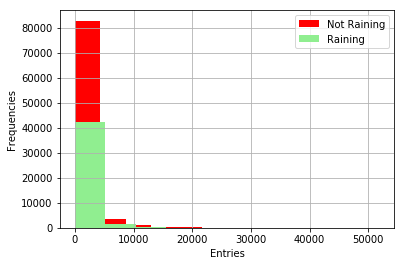

In [108]:
def plottinggraph(df):
        
# Now Plot the Frame
    review=df['rain']==0.0
# We will store all not raining entries in variable ent
    ent=df['ENTRIESn_hourly'][review]
    

    review1=df['rain']==1.0
# We will store all raining entries in variable ent1
    ent1=df['ENTRIESn_hourly'][review1]
    
# Plotting
    plt.hist(ent,color='red',stacked=True,label='Not Raining')
    plt.grid()
    plt.legend()
    plt.hist(ent1,color='lightgreen',stacked=True,label='Raining')
 
    plt.legend()
    plt.xlabel('Entries')
    plt.ylabel('Frequencies')
    plt.show()
    

    
    
plottinggraph(df)




# As we can see in the above histograms grouped into (bins of 10000) we can conclude that Entries of not raining grouped into bins are larger as compared to entries of raining, we can see from the above frequency.

# Below are the histograms that are not merged as we can see above that while merging it gives us the combined entries as shown above. (Optional)

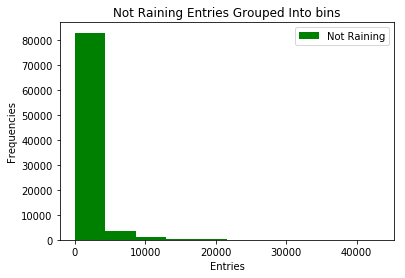

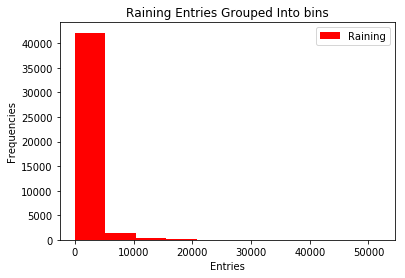

In [66]:
# We will store a boolean dataframe for all where there is no rain
review=df['rain']==0.0
# Now we will get the exact entries by passing that boolean entries into a dataframe
ent=df['ENTRIESn_hourly'][review]

# Same thing for this also but the change is we are calculating for Raining entries
review1=df['rain']==1.0

ent1=df['ENTRIESn_hourly'][review1]
ent1

# Plotting the histograms Seperately

plt.hist(ent,color='green',label=['Not Raining'])

plt.xlabel('Entries')
plt.ylabel('Frequencies')
plt.title('Not Raining Entries Grouped Into bins')
plt.legend()
plt.show()
plt.hist(ent1,color='red',label='Raining')
plt.legend()

plt.xlabel('Entries')
plt.ylabel('Frequencies')
plt.title('Raining Entries Grouped Into bins')
plt.show()

# In histograms we have bins of grouped(10000) entries which clearly depicts that Not raining entries are more.

# As Histograms are suitable for groupings they cannot descibe the relation between discrete and continuous.


# Below is a more detailed analysis.

# A Bar representation (Optional)






Hour           1.150000e+01
Raining        2.031442e+06
Not Raining    3.990738e+06
dtype: float64

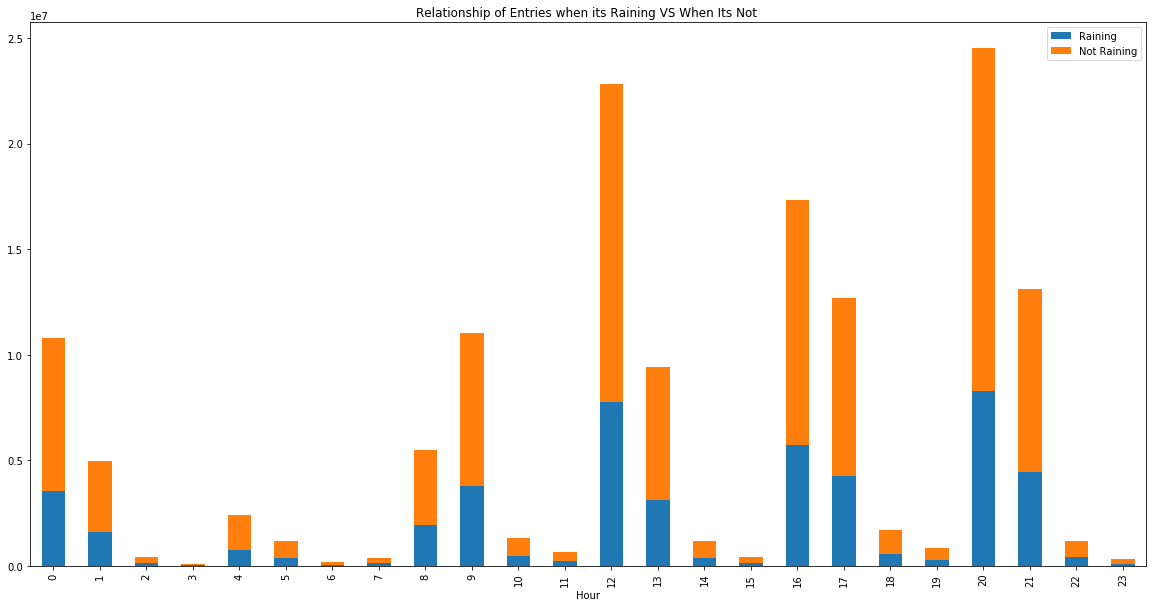

In [149]:
def plotting(df):
    # Calling Function
    allstuff,norain=rainvsnotrain(df)
    # We will now copy the not raining stuff into a newly created column where all the thing lies
    allstuff['Not Raining']=norain['Not Raining']


# Now Plot the Frame
# I am using stacked=True as this will overlap both raining entries and not raining entries
    graph=allstuff.plot(stacked=True,title="Relationship of Entries when its Raining VS When Its Not ",kind='bar',x='Hour',y=['Raining','Not Raining'],figsize=(20,10))
    
    return graph,allstuff
    #return allstuff



# Main function calling
graph,allstuff=plotting(df)
allstuff.mean(axis=0)




# We can clearly predict from above two (histograms and bar graph) that histograms shows that not raining entries are more as compared to raining entries.

# Where as bar shows the exact hour where entries are more.( we are using the bar plot because we wan't to see that in which hour entries are more and are entries more for a raining day or non raining day)


# When we plot a bar type Note As This analysis is made on skewed data when we will transform it we will again see it furthur.


# As we can see that most real world data is skewed.



# A Scatter Plot Entries on Rain as well as on Hour


**A scatter plot helps us to depict the behaviour of one attribute to another , as we can see that the outliner in the rain section can cause a slight variation but a constant growth in no rain section(that is at 0.0 cm) clearly shows the dependency of entries on rain as well.**

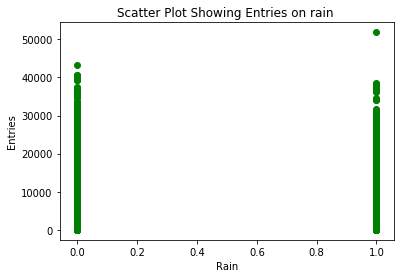

In [150]:
def entriesonrain(df):
    
    entries=list(df['ENTRIESn_hourly'])
    rain=list(df['rain'])
    plt.scatter(rain,entries,color='green')
    plt.xlabel("Rain")
    plt.ylabel("Entries")
    plt.title("Scatter Plot Showing Entries on rain ")
    
    
    
    
entriesonrain(df)





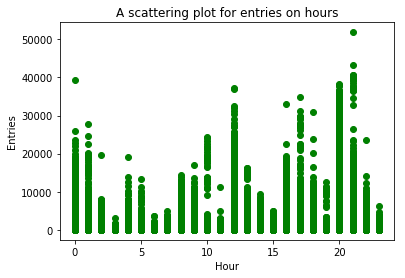

In [151]:
def entriesvshour(df):


  
    
    plt.scatter(list(df['Hour']),list(df['ENTRIESn_hourly']),color='green')
    plt.xlabel("Hour")
    plt.ylabel("Entries")
    plt.title("A scattering plot for entries on hours")
    plt.show()
    
    


entriesvshour(df)

# Corelation Among the variables for entries 


In [152]:
df[['ENTRIESn_hourly','Hour','rain','EXITSn_hourly']].corr(method='pearson')
# Corelation among the attribues


,ENTRIESn_hourly,Hour,rain,EXITSn_hourly
ENTRIESn_hourly,1.000000,0.175430,0.003062,0.744316
Hour,0.175430,1.000000,-0.001285,0.159397
rain,0.003062,-0.001285,1.000000,0.002551
EXITSn_hourly,0.744316,0.159397,0.002551,1.000000


# A Hidden Pattern

** What i observed is that number of entries does not directly rely on the rain but it indirectly rely on the hour timming as i found the corelation among them to be highest for hour section.
The corelation for Entry on Hour is 0.17 vs entry on rain that is 0.003  **

A common and usual corelation between Entries and Exits is 0.74 which shows that number of entries  favours the number of exits point.
As Entry increases exits also increases


'\n\nA Scatter plot predicting the number of entries and exits\n\n\n\n'

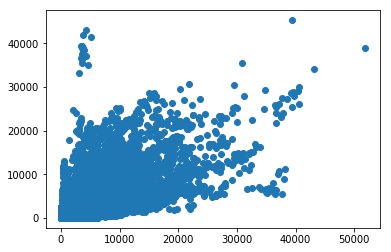

In [153]:
plt.scatter(list(df['ENTRIESn_hourly']),list(df['EXITSn_hourly']))

"""

A Scatter plot predicting the number of entries and exits



"""




# Result Obtained


 ** 1) A Histogram clearly depicts that more entries are on the road when it's not raining as compared to when it's raining. **
 
 ** Note -> This observation for (Bar plotting for entries and hour) is made on the skewed data below you will notice that when we normalize our data distribution that is when we will remove the skewedness using log transformation regression, you will notice a variation in the analysis. **

 ** 2) As the margin for raining also have a good scale on the graph. More Entries have been observed through this graph when the time is 12 during afternoon and 16 at evening corresponding 20 at the night. **
 
 ** By using bar we get to know the exact hour points as explained in point 2 which can be furthur used for more analysis breakdown **

# Data Points

** As more entries are for the non rainy days can be seen in above graph, this plays a huge role towards favouring of data sets towards not raining scale when compared to the raining scale **

### *Exercise 2.7

The data you just plotted is in what kind of distribution? Is there a difference in distribution between rainy and non-rainy days?

** Answer 1**:
# Observation for histograms

Well looking at above histogram data we can definitely say that our data  not normally
distributed and it's more **left skewed in the graph** that means it is **right skewed distribution.**

# Observation  for bar plots
As more data is left skewed as we can see that when data is more left skewed a higher peaks can be seen on the graph in the right side.

Thus we can clearly see that in the graph high peeks on the right side made our data to be more **left skewed distribution**

** So we will apply a log transformation regression on the data to make it normally distributed for the bar plots.**

It Will make our Data evenly distributed



# Below Is the distribution for rainy days and non rainy days

# Below is the code for graph of bar plotting which shows a high peak on the right side which follows the property of skewedness.

# This is the same bar plot which we used to get the detailed analysis that at which hour entries were more.

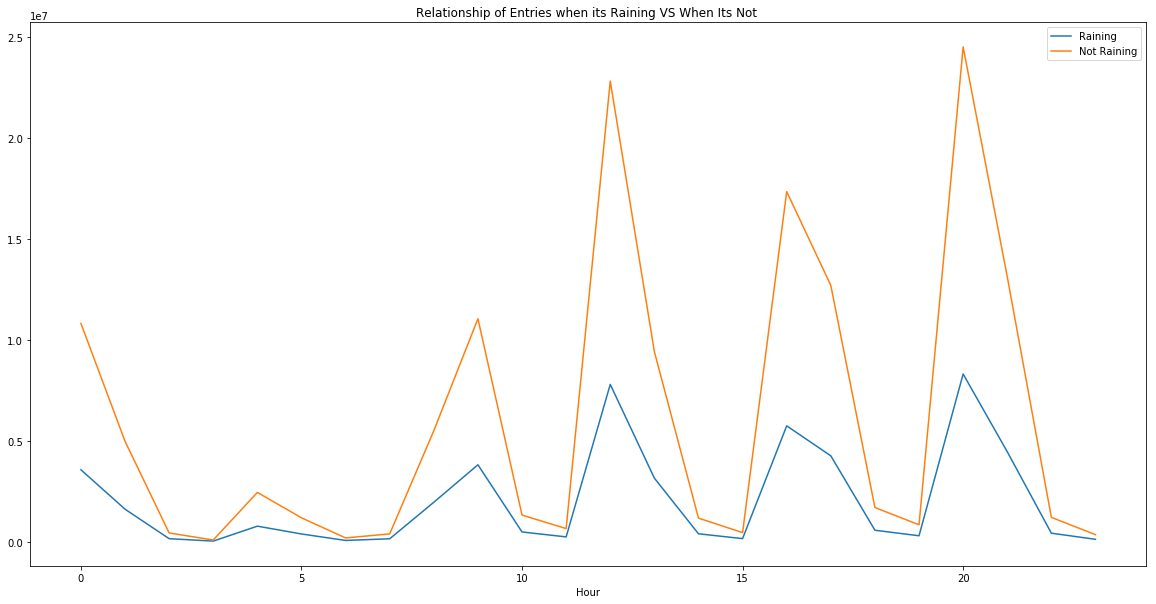

In [154]:
def plotting(df):
    # Calling Function
    allstuff,norain=rainvsnotrain(df)
    # We will now copy the not raining stuff into a newly created column where all the thing lies
    allstuff['Not Raining']=norain['Not Raining']


# Now Plot the Frame
# I am using stacked=True as this will overlap both raining entries and not raining entries
    graph=allstuff.plot(stacked=True,title="Relationship of Entries when its Raining VS When Its Not ",kind='line',x='Hour',y=['Raining','Not Raining'],figsize=(20,10))
    return graph,allstuff
    return allstuff




# Main function calling
graph,allstuff=plotting(df)





# The Properties of left skewed distribution is as follows 
** mean is generally less than the median **






median
 Hour               11.5
Raining        521366.5
Not Raining    980750.5
dtype: float64

mean
 Hour           1.150000e+01
Raining        2.031442e+06
Not Raining    3.990738e+06
dtype: float64


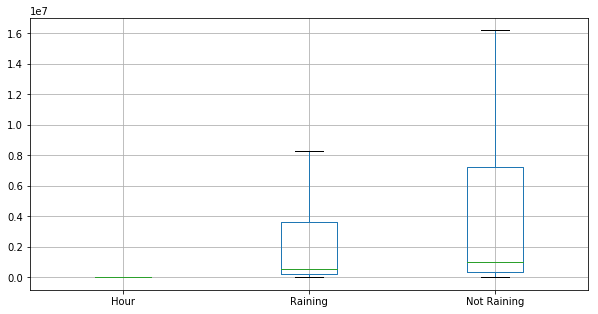

In [155]:
print("median\n",allstuff.median(axis=0))
print("\nmean\n",allstuff.mean(axis=0))


bp=allstuff.boxplot(figsize=(10,5))


# As You can see in the above figure a boxplot which shows the high median for the data .

# Now we will apply a log transformation regression so that data is evenly distributed and no wrong analysis is made.


# You can look below that now our plots are evenly distributed there is no uneven hikes, its normal everywhere.

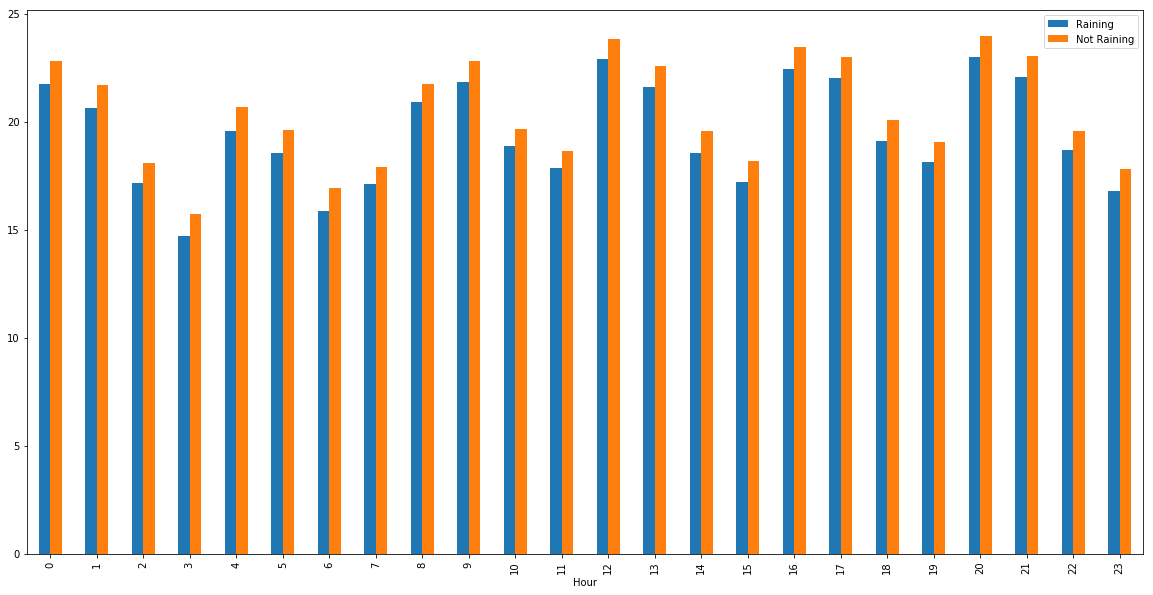

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
new=np.log2(allstuff[['Raining','Not Raining']])
new['Hour']=allstuff['Hour']
new.plot(x='Hour',y=['Raining','Not Raining'],kind='bar',figsize=(20,10))







# You can notice that when we evenly distributed which is the like Normal Distribution (mean ==median).


# And Our Data Follows That

In [157]:
print("---@@ MEAN @@ ---\n ",new.mean())
print("---- @@ MEDIAN @@ ---\n",new.median())

---@@ MEAN @@ ---
  Raining        19.469123
Not Raining    20.436087
Hour           11.500000
dtype: float64
---- @@ MEDIAN @@ ---
 Raining        18.986921
Not Raining    19.887977
Hour           11.500000
dtype: float64


** Answer 2 **

# Below is the graph which shows the distribution of rainy days and non rainy days on various dates that on which day it rain and on which day it didn't

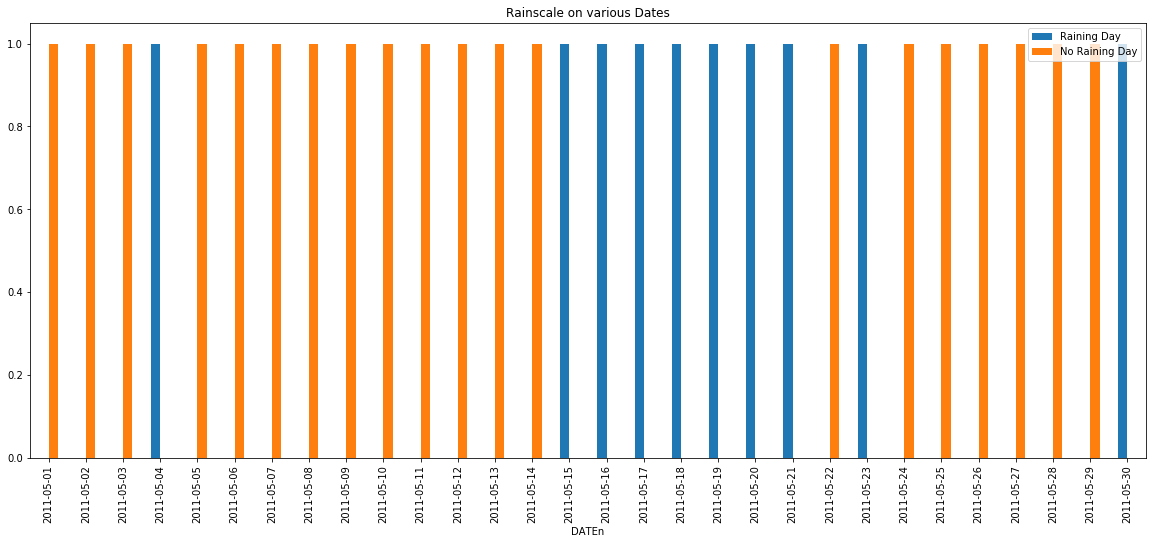

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def rainongraph(df):
    days=df[['DATEn','rain']]
    # Finding the data where rain is 0.0 
    norain=days['rain']==0.0
    all=days[norain]
    
    # Finding the data where rain is 1.0
    rain=days['rain']==1.0
    
    
    all1=days[rain]
    # Dropping the duplicates column entries 
    all=all.drop_duplicates()
    
    
    all1=all1.drop_duplicates()
    #print(all)
    graph=pd.merge(all1,all,how='outer',sort=True)
    del graph['rain']
    #  Joining the columns based on DATE
    graph=pd.merge(graph,all,on='DATEn',how='left',sort=True)
    graph=pd.merge(graph,all1,on='DATEn',how='left',sort=True)
    

    return graph

    
    
graph=rainongraph(df)

"""

The distribution between rainy days and non rainy days is as follows

"""



# We are creating a function that will assign value 1 where it dosent rain in a seperate column just to 
# Distinguish between rainy days and non rainy days

# If we will not do it  bars will not be shown for non rainy days because non rainy days consist of 0.0 values,
# So it wont show up in the graph, thats the reason we are creating a seperate column for non rainy days 
# and are assigning value 1.0 so that when we plot it will show up in the graph but the fact that it will represent a non rainy day



def x(a):
    if(a==0.0):
        return 1.0
    
# Applying the function for our job to make it easy
graph['No Raining Day']=graph['rain_x'].apply(x)

# Renaming that column
graph=graph.rename(columns={'rain_y':'Raining Day'})
# Deleting that old column
del graph['rain_x']

# Plotting the graph

# on x asis DATEn
# On y axis both raining day as well as non raining day
# Kind= bar we can give what ever we want
# figsize is a tuple of two values to give a mannual size

graph.plot(x='DATEn',y=['Raining Day','No Raining Day'],kind='bar',title="Rainscale on various Dates",figsize=(20,8))

# I did it ,Sir you said that its the challenging one .well it was :-)




# Answer

# The difference in distribution between rainy days and non rainy days is normal distribution, that is in the graph they are normally distributed every where as compared to above two graphs.


# They are normaly distributed over the graph.


### *Exercise 2.8

Build a function that returns:

1. The mean of entries when it's raining
2. The mean of entries when it's not raining




In [159]:
import numpy as np

import pandas

def means(turnstile_weather):
    whenrains = turnstile_weather['rain']==1.0
    
    # Grouping the data where rain value is 1.0 
    dataforrain= turnstile_weather[whenrains][['ENTRIESn_hourly']]
    
    # Performing a sum on the data
    sumup1 = dataforrain['ENTRIESn_hourly'].sum()
    
    # Counting how many values exist and then sum them up
    count1 = dataforrain['ENTRIESn_hourly'].value_counts().sum()
    with_rain_mean = sumup1/count1
    # Same Process for nonrain also
    whennorain = turnstile_weather['rain']==0.0
    datafornorain= turnstile_weather[whennorain][['ENTRIESn_hourly']]
    sumup2 = datafornorain['ENTRIESn_hourly'].sum()
    count2 = datafornorain['ENTRIESn_hourly'].value_counts().sum()
    
    # Divide it up with count to get the mean
    without_rain_mean =sumup2/count2
    
    
    
    
    return with_rain_mean, without_rain_mean,p # leave this line for the grader

# whats that p in return value i havent changed anything as mentioned

#rainmean , norainmean = means(df)

#print( rainmean ,",", norainmean )





Answer to the following questions according to your functions' exits:

1. What is the mean of entries when it's raining?
2. What is the mean of entries when it's not raining?


** Answer **: 

** The mean of entries when it's raining is  1105.4463767458733 **


** The mean of entries when it's not raining is  1090.278780151855 **

## Exercise 3 - Map Reduce

### *Exercise 3.1*

The entry for this exercise is the same file from the previous session (Exercise 2). You can download the file from this link:

 https://s3.amazonaws.com/content.udacity-data.com/courses/ud359/turnstile_data_master_with_weather.csv

Now, we will create a mapper. For each entry line, the mapper exit must PRINT (not return) UNIT as a key, and the number of ENTRIESn_hourly as the value. Separate the key and the value with a tab. For example: 'R002 \ t105105.0'

Export your mapper into a file named mapper_result.txt and send it with your submission. The code for exporting your mapper is already written in the code bellow.




In [160]:
import sys

def mapper():
    count=0
    #

    for line in sys.stdin:
        # Using a count variable to keep track wether this is my first line or not
        # As the first line contains headings
        if(count==0):
            count=1
            continue;
        line=line.strip().split(',')
        key = line[1];
        value =line[6]
        # Printing the key value pair as we did in  problem set and mini project
        
        print("{0}\t{1}".format(key,value))
        


# We have to assign the file before calling the main function
sys.stdin = open('turnstile_data_master_with_weather.csv')
# Writting it into the file
sys.stdout = open('mapper_result.txt', 'w')
mapper()


### *Exercise 3.2*

Now, create the reducer. Given the mapper result from the previous exercise, the reducer must print (not return) one line per UNIT, with the total number of ENTRIESn_hourly during May (which is our data duration), separated by a tab. An example of exit line from the reducer may look like this: 'R001 \ t500625.0'

You can assume that the entry for the reducer is ordered in a way that all lines corresponding to a particular unit are grouped. However, the reducer exit will have repetition, as there are stores that appear in different files' locations.

Export your reducer into a file named reducer_result.txt and send it with your submission.

In [161]:
import sys;
def reducer():
    oldkey= None;
    oldsum=0.0

    for line in sys.stdin:
        line=line.split('\t');
        key=line[0];
        value=float(line[1])
        # If key dosent match that means its the new key and the data we have gathered about the previous one, now its time to print it
        if(oldkey and oldkey!=key):
            print("{0}\t{1}".format(oldkey,oldsum))
            oldkey=key;
            # We are resetting this value because new key value should not be added with old value's sum
            oldsum=0.0
        # If the key is same gather the data update the value    
        oldkey=key;
        oldsum+=value
        
    # This Step is necessary as our last oldkey will be left because there would be no keys after that and loop will exit     
    # Thats the reason we are printing this key value over here
    if oldkey:
        print("{0}\t{1}".format(oldkey,oldsum))

# We have to point the path to stdin and stdout before we call our function        
sys.stdin = open('mapper_result.txt')        
sys.stdout=open("reducer_result.txt",'w')
reducer()
